In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

agosto13 = pd.read_csv('1308.csv')
septiembre13 = pd.read_csv('1309.csv')
octubre13 = pd.read_csv('1310.csv')
noviembre13 = pd.read_csv('1311.csv')
diciembre13 = pd.read_csv('1312.csv')
enero14 = pd.read_csv('1401.csv')
febrero14 = pd.read_csv('1402.csv')
marzo14 = pd.read_csv('1403.csv')
abril14 = pd.read_csv('1404.csv')
mayo14 = pd.read_csv('1405.csv')
junio14 = pd.read_csv('1406.csv')
enero15 = pd.read_csv('1501.csv')
agosto15 = pd.read_csv('1508.csv')
marzo16 = pd.read_csv('1603.csv')
abril16 = pd.read_csv('1604.csv')
mayo16 = pd.read_csv('1605.csv')
junio16 = pd.read_csv('1606.csv')
enero17 = pd.read_csv('1701.csv')
agosto17 = pd.read_csv('1708.csv')

datos = pd.concat([agosto13, septiembre13, octubre13, noviembre13, diciembre13, enero14, febrero14, \
                          marzo14, abril14, mayo14, junio14, enero15, agosto15, marzo16, abril16, mayo16, \
                          junio16, enero17, agosto17])

datosForTesting = pd.read_csv('properati_dataset_testing_noprice.csv')
 

In [2]:
datosForTesting.count()

id                         14166
created_on                 14166
property_type              14166
operation                  14166
place_name                 14166
place_with_parent_names    14166
country_name               14166
state_name                 14166
lat-lon                    10487
lat                        10487
lon                        10487
surface_total_in_m2        11853
surface_covered_in_m2      13005
floor                       1368
rooms                       7500
expenses                    2543
description                14166
dtype: int64

Algunos primeros datos del set a testear. Vemos que los únicos campos con bajo porcentaje de datos son el piso y las expensas.

In [3]:
datos = datos.loc[:, ['id', 'created_on',  'property_type', 'operation', 'place_name', \
                      'place_with_parent_names', 'country_name', 'state_name', 'lat-lon', 'lat', 'lon', \
                     'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'expenses', 'description',\
                     'price_aprox_usd']]
datos.columns

Index([u'id', u'created_on', u'property_type', u'operation', u'place_name',
       u'place_with_parent_names', u'country_name', u'state_name', u'lat-lon',
       u'lat', u'lon', u'surface_total_in_m2', u'surface_covered_in_m2',
       u'floor', u'rooms', u'expenses', u'description', u'price_aprox_usd'],
      dtype='object')

In [4]:
print datosForTesting.operation.unique()

['venta' 'alquiler']


In [5]:
datosForTesting.loc[datosForTesting.operation == 'alquiler','id'].count()

1

In [6]:
print datos.operation.unique()

['sell']


In [7]:
datos['operation'] = datos['operation'].map(lambda x: 'venta' if x == 'sell' else 'alquiler')
datos.loc[datos.operation == 'venta', 'id'].count()

394859

In [8]:
print datosForTesting.property_type.unique()

['departamento' 'ph' 'casa']


In [9]:
datosForTesting.loc[datosForTesting.property_type == 'departamento', 'id'].count()

9761

In [10]:
print datos.property_type.unique()

['house' 'apartment' 'PH' 'store']


In [11]:
datos = datos.loc[datos.property_type != 'store', :]
datos.count()

id                          382226
created_on                 1101908
property_type              1101908
operation                  1101908
place_name                 1101851
place_with_parent_names    1101908
country_name                382226
state_name                  382226
lat-lon                     921414
lat                         921414
lon                         921403
surface_total_in_m2         254876
surface_covered_in_m2       307965
floor                       150100
rooms                       781325
expenses                     53797
description                 382210
price_aprox_usd             918368
dtype: int64

In [13]:
def traducirTipoPropiedad(x):
    tipo = ''
    if (x == 'house'):
        tipo = 'casa' 
    else:
        if (x == 'apartment'): 
            tipo = 'departamento'
        else: 
            if (x == 'PH'): 
                tipo = 'ph'
    return tipo        

In [14]:
datos['property_type'] = datos['property_type'].map(traducirTipoPropiedad)
datos.loc[datos.property_type == 'casa','id'].count()

144190

In [15]:
print datosForTesting.surface_total_in_m2.min()

0.0


In [16]:
print datosForTesting.surface_total_in_m2.max()

148000.0


In [17]:
print datos.loc[datos.surface_total_in_m2 > 150000, 'id'].count()

10


In [18]:
print datosForTesting.state_name.unique()

['Capital Federal' 'Buenos Aires Interior' 'Bs.As. G.B.A. Zona Sur'
 'Bs.As. G.B.A. Zona Oeste' 'Bs.As. G.B.A. Zona Norte']


In [18]:
print datosForTesting.loc[datosForTesting.state_name == 'Buenos Aires Interior', 'id'].count()

1


In [19]:
print datos.state_name.unique()

[nan 'Buenos Aires Interior' 'R\xc3\xado Negro' 'Capital Federal'
 'Buenos Aires Costa Atl\xc3\xa1ntica' 'Neuqu\xc3\xa9n' 'San Juan'
 'Bs.As. G.B.A. Zona Norte' 'Bs.As. G.B.A. Zona Sur'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Santa Fe' 'San Luis'
 'C\xc3\xb3rdoba' 'Entre R\xc3\xados' 'La Pampa' 'Salta' 'Tucum\xc3\xa1n'
 'Mendoza' 'Corrientes' 'Chaco' 'Jujuy' 'Catamarca' 'La Rioja' 'Chubut'
 'Formosa' 'Tierra Del Fuego' 'Santa Cruz' 'Santiago Del Estero']


In [20]:
datos = datos.loc[(datos['state_name'].str.contains('Capital Federal')| \
                   datos['state_name'].str.contains('Bs.As. G.B.A. Zona Sur')|\
                  datos['state_name'].str.contains('Bs.As. G.B.A. Zona Oeste')|\
                  datos['state_name'].str.contains('Bs.As. G.B.A. Zona Norte')),:]
datos.count()

id                         266059
created_on                 266059
property_type              266059
operation                  266059
place_name                 266002
place_with_parent_names    266059
country_name               266059
state_name                 266059
lat-lon                    183538
lat                        183538
lon                        183538
surface_total_in_m2        189874
surface_covered_in_m2      230103
floor                       34239
rooms                      139224
expenses                    32679
description                266048
price_aprox_usd            247383
dtype: int64

In [21]:
datos = datos.loc[datos['price_aprox_usd'].notnull(),:]
datos = datos.loc[datos['price_aprox_usd'] != 0,:]
datos.count()

id                         235455
created_on                 235455
property_type              235455
operation                  235455
place_name                 235398
place_with_parent_names    235455
country_name               235455
state_name                 235455
lat-lon                    161442
lat                        161442
lon                        161442
surface_total_in_m2        170226
surface_covered_in_m2      210078
floor                       32392
rooms                      121130
expenses                    31250
description                235444
price_aprox_usd            235455
dtype: int64

In [22]:
#Se hace la comparacion por lat, lon, superficie y superficie cubierta, tengo que quitar los nulls de esos campos
datosSinNull = datos.loc[datos['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]

#Luego de esos divido los que estan en palermo de los que no estan en palermo
datosPalermo = datosSinNull.loc[datosSinNull.place_name == 'Palermo', :]
datosNoPalermo = datosSinNull.loc[datosSinNull.place_name != 'Palermo', :]

#Divido al set de palermo en otros features y precios
datosPalermoFeatures = datosPalermo.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosPalermoPrecio = datosPalermo.loc[:, ['price_aprox_usd']]

#Divido al set que no es de palermo en otros features y precios
datosNoPalermoFeatures = datosNoPalermo.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosNoPalermoPrecio = datosNoPalermo.loc[:, ['price_aprox_usd']]

In [59]:
#Importo todas las librerias correspondientes a ML
#Para score
from sklearn.metrics import r2_score

#Para training y cross
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#Algoritmos
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn import gaussian_process
from sklearn import neural_network

/home/leandro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


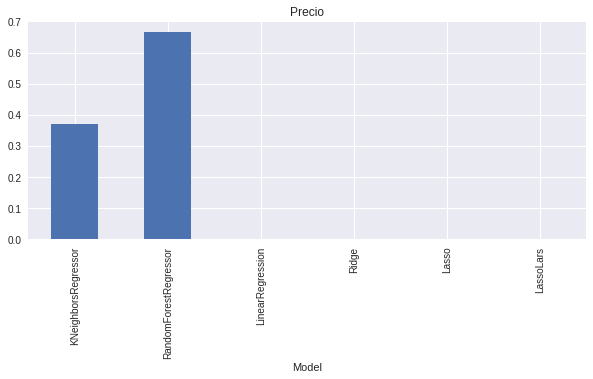

In [24]:
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         #RadiusNeighborsRegressor(),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1)]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(datosNoPalermoFeatures, datosNoPalermoPrecio)
        tmp['Precio'] = r2_score(datosPalermoPrecio, model.predict(datosPalermoFeatures))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

/home/leandro/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leandro/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


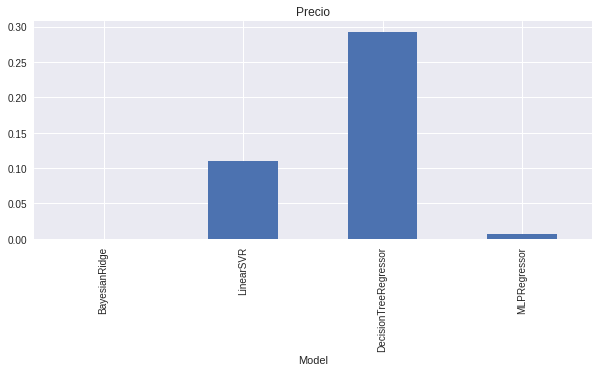

In [25]:
models = [linear_model.BayesianRidge(),
         #LogisticRegression(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         #gaussian_process.GaussianProcessRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(datosNoPalermoFeatures, datosNoPalermoPrecio)
        tmp['Precio'] = r2_score(datosPalermoPrecio, model.predict(datosPalermoFeatures))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

In [26]:
#Split del set de datos prueba 1
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)

In [27]:
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]

/home/leandro/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


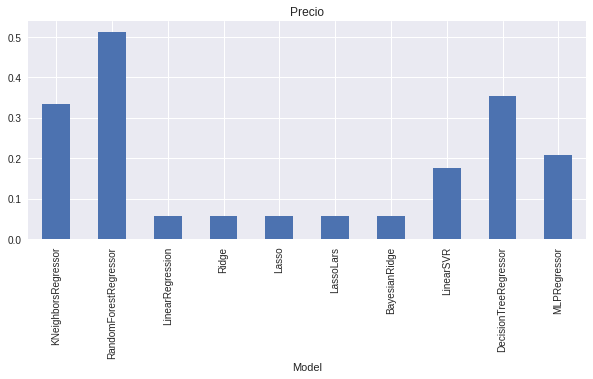

In [28]:
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

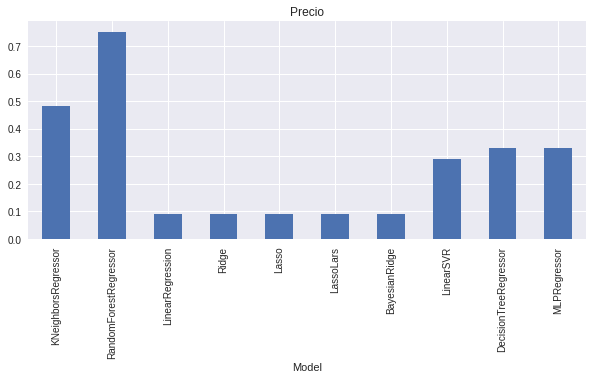

In [29]:
#Prueba 2
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

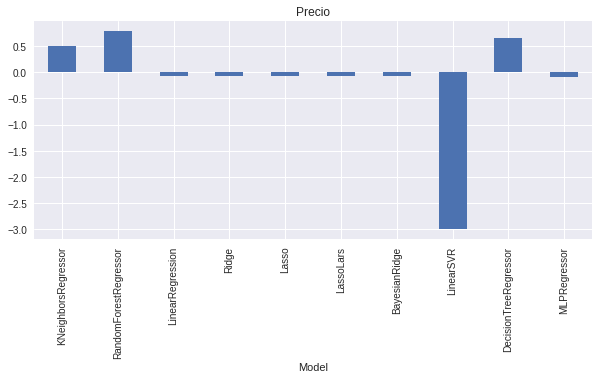

In [30]:
#Prueba 3
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

In [46]:
datosFiltradosFeatures = datosFiltrados.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosFiltradosPrecios = datosFiltrados.loc[:, ['price_aprox_usd']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.3193749 ,  0.90852784,  0.78727665,  0.74706295,  0.63907671])

In [50]:
RFRModel = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.2584208 ,  0.91204237,  0.77484542,  0.66607409,  0.63041404])

In [48]:
RFRModel = RandomForestRegressor()
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.25138166,  0.88470325,  0.59708272,  0.67097637,  0.60537916])

In [49]:
RFRModel = RandomForestRegressor(n_estimators=50, max_features=2)
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.31663359,  0.90991187,  0.79368348,  0.74809686,  0.63274897])

In [54]:
#primera estimacion al set de prueba
primeraPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

In [61]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(primeraPrueba)

array([[ -34.61098776,  -58.36346358,    0.        ,   64.        ],
       [ -34.612651  ,  -58.4432756 ,    0.        ,   64.        ],
       [ -34.58936332,  -58.41287986,   53.        ,   48.        ],
       ..., 
       [ -34.7585252 ,  -58.4097202 ,  219.        ,  135.        ],
       [ -34.56322108,  -58.46105268,   62.        ,   48.        ],
       [ -34.70919169,  -58.53028938,  367.        ,  130.        ]])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(datosFiltrados.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']], datosFiltrados['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba1 = RFRModel.predict(imp.fit_transform(primeraPrueba))
prueba1

array([ 307686.31166667,  159466.64      ,  185250.8197    , ...,
        167100.2048    ,  172813.33989524,  152105.        ])

In [79]:
archivo1 = pd.DataFrame()
archivo1['id'] = datosForTesting.loc[:,['id']]
archivo1['price_usd'] = prueba1
archivo1

,id,price_usd
0,3632,307686.311667
1,3633,159466.640000
2,2263404,185250.819700
3,2263405,83847.000000
4,2263406,141019.780741
5,2263407,83847.000000
6,2263408,83847.000000
7,2263409,83847.000000
8,2263410,139479.400000
9,2263411,109333.665000


In [85]:
archivo1.to_csv('prueba1.csv', index=False)

In [86]:
aVer = pd.read_csv('prueba1.csv')
aVer

,id,price_usd
0,3632,307686.311667
1,3633,159466.640000
2,2263404,185250.819700
3,2263405,83847.000000
4,2263406,141019.780741
5,2263407,83847.000000
6,2263408,83847.000000
7,2263409,83847.000000
8,2263410,139479.400000
9,2263411,109333.665000


In [79]:
from sklearn import svm
def get_outliners(datosFiltrado, outliers_fraction=0.25):
    clf = svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05, kernel="rbf", gamma=0.1)
    clf.fit(datosFiltrado)
    result = clf.predict(datosFiltrado)
    return result

In [ ]:
training_dataset = datosFiltrado[get_outliners(datosFiltrado, 0.15)==1]

In [44]:
#Datos Capital Federal
datosCapital = datos[datos['state_name'] == 'Capital Federal']
datosCapital = datosCapital.loc[datosCapital['price_aprox_usd'].notnull(),:]
datosCapital = datosCapital.loc[datosCapital['rooms'].notnull(),:]
datosCapital = datosCapital.loc[datosCapital['floor'].notnull(),:]
#datosCapitalForTraining = datosCapital[['place_name','price_aprox_usd','rooms','floor']]
datosCapitalForTraining = datosCapital[['price_aprox_usd','rooms','floor']]

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor


x_train, x_test, y_train, y_test = train_test_split(datosCapitalForTraining, datosCapitalForTraining['price_aprox_usd'], test_size=0.2)

model = RandomForestRegressor(n_estimators=100, max_features='sqrt')
model.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
unoCualquiera = datosCapital[datosCapital['place_name'] == 'Palermo'].head(5)
unoCualquiera = unoCualquiera[['price_aprox_usd','rooms','floor']]
unoCualquiera.head()

,price_aprox_usd,rooms,floor
1010,395000.0,5.0,5.0
1243,190000.0,2.0,3.0
4794,174700.0,2.0,3.0
7492,165000.0,3.0,12.0
8787,520000.0,4.0,5.0


In [82]:
print(model.predict(unoCualquiera))

[ 398700.    189444.88  174620.    165039.96  520800.  ]
